In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
def relu(X):
   return np.maximum(0,X)

#sigmoid and its derivative
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

#Normalize array
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

def unique(arr):
  count1=0
  count0=0
  for i in range(len(arr)):
    if arr[i]==1:
      count1+=1
    else:
      count0+=1
  return(count1,count0)

  def final_mat(data,lable):
  final_matrix=[]
  for i in range(len(data)): 
    y=data[i,:]-data[:,:]
    h_0=[]
    y1=np.sum(np.square(y),axis=1)
    y_dict={}
    for j in range(len(y1)):
      y_dict[j]=y1[j]
    #y_dict
    y_sorted={}
    y_sorted=sorted(y_dict.items(), key=lambda x: x[1])
    v=(np.asarray(y_sorted[0:6])[:,0]).astype(int)
    h_0.append(np.average(data[v,:],axis=0))
    h_0.append(lable[j])
    final_matrix.append(list(h_0)[0])
  return(final_matrix)
  

#Data Preprocessing

In [0]:
data=pd.read_csv('/content/wdbc.data',header=None)
data.columns=["A","B","B1","B2","B3","B4","B5","B6","B7","B8","B9","B10","B11","B12","B13","B14","B15","B16","B17","B18","B19","B20","B21","B22","B23","B24","B25","B26","B27","B28","B29","B30"]
data['B'].replace(['M', 'B'], [0,1], inplace=True)

In [0]:
data_array1=np.asarray(data)
np.random.shuffle(data_array1)
data_array2=data_array1[:,2:].astype(float)
data_array=data_array2 / data_array2.max(axis=0)
lable_array=data_array1[:,1]

train_data=data_array[0:int(data_array.shape[0]*.7),:]
train_lable=lable_array[0:int(data_array.shape[0]*.7)]

test_data= data_array[int(data_array.shape[0]*.7):int(data_array.shape[0]*.9),:]
test_lable=lable_array[int(data_array.shape[0]*.7):int(data_array.shape[0]*.9)]

validation_data=data_array[int(data_array.shape[0]*.9):,:]
validation_lable=lable_array[int(data_array.shape[0]*.9):]

In [0]:
g=np.asarray(final_mat(train_data,train_lable))
h_0_with_lable=np.concatenate((g,train_lable.reshape((train_data.shape[0],1))),axis=1)
h_0_with_lable.shape

g1=np.asarray(final_mat(test_data,test_lable))
test_with_lable=np.concatenate((g1,test_lable.reshape((test_data.shape[0],1))),axis=1)
test_with_lable.shape

g2=np.asarray(final_mat(validation_data,validation_lable))
validation_with_lable=np.concatenate((g2,validation_lable.reshape((validation_data.shape[0],1))),axis=1)
validation_with_lable.shape

(57, 31)

#Training with backpropagation

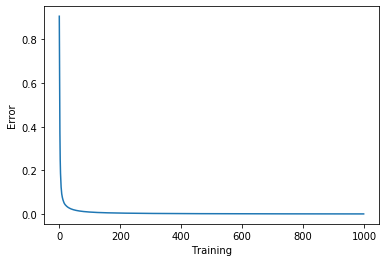

Training Accuracy 99.91%


In [0]:
w0 = 2*np.random.random((30, 30))-1
w1 = 2*np.random.random((30,1)) - 1

#learning rate
n = 0.1

#Errors - for graph later
errors = []

for i in range(1000):
  for j in range(0,len(h_0_with_lable)):
     l_0=h_0_with_lable[j,0:-1].reshape((30,1))
     l_1=relu(np.dot(l_0.T,w0).reshape((30,1)))
     l_2=sigmoid(np.dot(l_1.T,w1))

     #Back propagation using gradient descent
     l_2_error = np.sqrt(np.square(l_2-h_0_with_lable[j,-1]))
     l_2_delta = l_2_error * sigmoid_deriv(l_2)
     l_1_error = l_2_delta.dot(w1.T)
     l_1_delta = l_1_error * sigmoid_deriv(l_1)
  w1 += l_1.dot(l_2_delta)* n
  w0 += l_0.T.dot(l_1_delta)* n
  error = np.mean(l_2_error)   
  errors.append(error)
  accuracy = (1 - error) * 100

plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()
        
print("Training Accuracy " + str(round(accuracy,2)) + "%")

#Validation

In [0]:
for j in range(0,len(validation_with_lable)):
  l0 = validation_with_lable[j,0:-1].reshape((30,1))
  l1 = relu(np.dot(l0.T, w0))
  l2 = sigmoid(np.dot(l1, w1))
  l2_error = np.sqrt(np.square(validation_with_lable[j,-1] - l2))
error = np.mean(np.abs(l2_error))
accuracy = (1 - error) * 100
print("Validation Accuracy " + str(round(accuracy,2)) + "%")

Validation Accuracy 99.94%


#Testing


In [0]:
for j in range(0,len(test_with_lable)):
  l0 = test_with_lable[j,0:-1].reshape((30,1))
  l1 = relu(np.dot(l0.T, w0))
  l2 = sigmoid(np.dot(l1, w1))
  l2_error = np.sqrt(np.square(test_with_lable[j,-1] - l2))
error = np.mean(np.abs(layer2_error))
accuracy = (1 - error) * 100
print("Validation Accuracy " + str(round(accuracy,2)) + "%")

Validation Accuracy 99.91%


#Other Algorithms

##KNN

In [204]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(train_data,train_lable)
y_pred_knn= model_knn.predict(test_data)

print("Accuracy:",metrics.accuracy_score(test_lable, y_pred_knn)*100,'%')

Accuracy: 93.85964912280701 %


##SVM

In [205]:
from sklearn.svm import SVC
model_svm = SVC(gamma='auto', kernel='sigmoid')
model_svm.fit(train_data,train_lable)
y_pred_svm=model_svm.predict(test_data)

print("Accuracy:",metrics.accuracy_score(test_lable, y_pred_svm)*100,'%')

Accuracy: 94.73684210526315 %


##LOGISTIC REGRESSION

In [206]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression().fit(train_data, train_lable)
y_pred_logistic=model_logistic.predict(test_data)

print("Accuracy:",model_logistic.score(test_data,y_pred_logistic)*100,'%')

Accuracy: 100.0 %
